In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

years = range(2002,2018)
prev_year_columns = ['PrevPPG', 'PrevPassingYards','PrevPassingTouchdowns','PrevPassingInterceptions','PrevPlayed', 'PrevRushingYards','PrevRushingTouchdowns','PrevReceptions','PrevReceivingYards','PrevReceivingTouchdowns','PrevFumblesLost']
current_year_columns = ['FantasyPointsPerGame','PassingYards', 'PassingTouchdowns', 'PassingInterceptions', 'Played', 'RushingYards','RushingTouchdowns','Receptions','ReceivingYards','ReceivingTouchdowns','FumblesLost']
feature_columns = prev_year_columns + ['YearsInLeague']


year_dfs = []
for year in years:
    year_df = pd.read_csv('./datasets/fantasy-football-leaders-{}.csv'.format(year))
    year_df['Year'] = year
    year_dfs.append(year_df)

all_players = pd.concat(year_dfs)
all_players = all_players.set_index(['Name'])
all_players['RookieYear'] = all_players.groupby('Name')['Year'].min()
all_players['YearsInLeague'] = all_players['Year'] - all_players['RookieYear']
all_players[prev_year_columns] = all_players.groupby(['Name'])[current_year_columns].shift(1)
all_players = all_players[np.isfinite(all_players['PrevPPG'])]
all_players

Team Position  Played  PassingYards  PassingTouchdowns  \
Name                                                                         
T Brown              OAK       WR      16             0                  0   
Priest Holmes         KC       RB      16             0                  0   
LaDainian Tomlinson  LAC       RB      16            21                  1   
Ahman Green           GB       RB      16             0                  0   
Jamal Lewis          BAL       RB      16             0                  0   
Clinton Portis       DEN       RB      13             0                  0   
Daunte Culpepper     MIN       QB      14          3479                 25   
Peyton Manning       IND       QB      16          4267                 29   
Randy Moss           MIN       WR      16             0                  0   
Shaun Alexander      SEA       RB      16             0                  0   
Deuce McAllister      NO       RB      16             0                  0   
Trent Green           KC       QB      16          4039                 24   
Matt Hasselbeck      SEA       QB      16          3841                 26   
Torry Holt           LAR       WR      16             0                  0   
Steve McNair         TEN       QB      14          3215                 24   
Aaron Brooks          NO       QB      16          3546                 24   
Fred Taylor          JAX       RB      16             0                  0   
Jeff Garcia           SF       QB      13          2704                 18   
Ricky Williams       MIA       RB      16             0                  0   
Brett Favre           GB       QB      16          3361                 32   
Jon Kitna            CIN       QB      16          3591                 26   
Donovan McNabb       PHI       QB      16          3216                 16   
Marc Bulger          LAR       QB      15          3845                 22   
Brad Johnson          TB       QB      16          3811                 26   
Edgerrin James       IND       RB      13             0                  0   
Tom Brady             NE       QB      16          3620                 23   
Travis Henry         BUF       RB      15             0                  0   
Stephen Davis        CAR       RB      14             0                  0   
Chad Johnson         CIN       WR      16             0                  0   
Quincy Carter        DAL       QB      16          3302                 17   
...                  ...      ...     ...           ...                ...   
Charles Sims          TB       RB      16             0                  0   
Aldrick Robinson      SF       WR      16             0                  0   
Jacquizz Rodgers      TB       RB      16             0                  0   
Kenny Britt           NE       WR      12             0                  0   
Alfred Blue          HOU       RB      11             0                  0   
Benjamin Cunningham  CHI       RB      14             0                  0   
Kyle Juszczyk         SF       FB      14             0                  0   
Mike Tolbert         BUF       FB      12             0                  0   
Darren Fells         DET       TE      16             0                  0   
Zach Miller          CHI       TE       8             0                  0   
Rhett Ellison        NYG       TE      16             0                  0   
Chester Rogers       IND       WR      11             0                  0   
Tyler Boyd           CIN       WR      10             0                  0   
TJ Yates             HOU       QB       4           523                  4   
Nick Foles           PHI       QB       7           537                  5   
Mike Glennon         CHI       QB       4           833                  4   
Wendell Smallwood    PHI       RB       8             0                  0   
Jordan Reed          WAS       TE       6             0                  0   
Jordan Matthews      BUF       WR      10 

In [146]:
## KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = non_rookies['PrevPPG'].values.reshape(-1,1)
y = non_rookies['FantasyPointsPerGame'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 6).fit(X_train, y_train)
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))


R-squared test score: 0.549


In [147]:
## Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [[0.75009891]]
linear model intercept (b): [1.72430836]
R-squared score (training): 0.582
R-squared score (test): 0.561


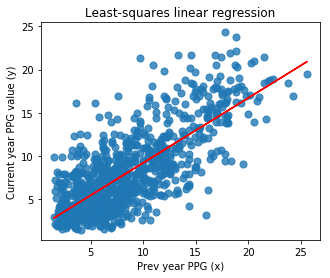

In [148]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Prev year PPG (x)')
plt.ylabel('Current year PPG value (y)')
plt.show()

In [124]:
## Ridge regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import Ridge

X = all_players[feature_columns].values
y = all_players['FantasyPointsPerGame'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=10).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: [3.87582195]
ridge regression linear model coeff:
[[15.69970887 -0.03485786 -0.45551942 -0.78759033 -1.08082884  0.05494138
  -1.61377231  3.79469075 -0.2808802 ]]
R-squared score (training): 0.555
R-squared score (test): 0.549
Number of non-zero features: 9


In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Lasso

X = all_players[feature_columns].values
y = all_players['FantasyPointsPerGame'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.05, max_iter=60000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))

lasso regression linear model intercept: [3.58326436]
lasso regression linear model coeff:
[16.26437881 -0.         -0.         -0.         -1.07947341 -0.
 -0.          1.38855343 -0.        ]
R-squared score (training): 0.546
R-squared score (test): 0.549
Number of non-zero features: 3


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

position_to_analyze = 'RB'
position_players = all_players[all_players['Position'] != None] 

X = position_players[feature_columns].values
y = position_players['FantasyPointsPerGame'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [[ 7.53360100e-01  2.83501597e-02 -3.39653619e-04 -1.41286219e-01
  -3.97987777e-03  6.94669032e-05 -1.80793319e-01  2.61684024e-01
  -7.49287956e-02]]
linear model intercept (b): [2.22830932]
R-squared score (training): 0.566
R-squared score (test): 0.559

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[[ 1.81343838e-11  3.78565621e-01  2.10022681e-01 -4.32270715e-03
  -6.56728011e-01 -2.61861932e-01 -8.83340377e-04 -3.37184805e-01
   2.81954654e-01 -2.20579405e-01 -6.19617123e-03  2.52821397e-02
   1.88564735e-05  1.39503300e-02  2.92437109e-02 -7.06191596e-04
  -2.42411009e-03 -5.17649923e-03  6.94124247e-03 -2.49691781e-02
   2.98050277e-04  3.29430972e-02  1.20062364e-02  3.05294255e-04
   5.41905974e-03  2.59206133e-02  8.59536978e-03 -8.86461509e-07
  -7.24811413e-06 -2.25680536e-05 -1.03737834e-05  1.06612125e-04
  -1.12638958e-04 -1.58626103e-04 -4.27267777e-03 -2.5477

In [143]:
position_players

Team Position  Played  PassingYards  PassingTouchdowns  \
Name                                                                         
T Brown              OAK       WR      16             0                  0   
Priest Holmes         KC       RB      16             0                  0   
LaDainian Tomlinson  LAC       RB      16            21                  1   
Ahman Green           GB       RB      16             0                  0   
Jamal Lewis          BAL       RB      16             0                  0   
Clinton Portis       DEN       RB      13             0                  0   
Daunte Culpepper     MIN       QB      14          3479                 25   
Peyton Manning       IND       QB      16          4267                 29   
Randy Moss           MIN       WR      16             0                  0   
Shaun Alexander      SEA       RB      16             0                  0   
Deuce McAllister      NO       RB      16             0                  0   
Trent Green           KC       QB      16          4039                 24   
Matt Hasselbeck      SEA       QB      16          3841                 26   
Torry Holt           LAR       WR      16             0                  0   
Steve McNair         TEN       QB      14          3215                 24   
Aaron Brooks          NO       QB      16          3546                 24   
Fred Taylor          JAX       RB      16             0                  0   
Jeff Garcia           SF       QB      13          2704                 18   
Ricky Williams       MIA       RB      16             0                  0   
Brett Favre           GB       QB      16          3361                 32   
Jon Kitna            CIN       QB      16          3591                 26   
Donovan McNabb       PHI       QB      16          3216                 16   
Marc Bulger          LAR       QB      15          3845                 22   
Brad Johnson          TB       QB      16          3811                 26   
Edgerrin James       IND       RB      13             0                  0   
Tom Brady             NE       QB      16          3620                 23   
Travis Henry         BUF       RB      15             0                  0   
Stephen Davis        CAR       RB      14             0                  0   
Chad Johnson         CIN       WR      16             0                  0   
Quincy Carter        DAL       QB      16          3302                 17   
...                  ...      ...     ...           ...                ...   
Charles Sims          TB       RB      16             0                  0   
Aldrick Robinson      SF       WR      16             0                  0   
Jacquizz Rodgers      TB       RB      16             0                  0   
Kenny Britt           NE       WR      12             0                  0   
Alfred Blue          HOU       RB      11             0                  0   
Benjamin Cunningham  CHI       RB      14             0                  0   
Kyle Juszczyk         SF       FB      14             0                  0   
Mike Tolbert         BUF       FB      12             0                  0   
Darren Fells         DET       TE      16             0                  0   
Zach Miller          CHI       TE       8             0                  0   
Rhett Ellison        NYG       TE      16             0                  0   
Chester Rogers       IND       WR      11             0                  0   
Tyler Boyd           CIN       WR      10             0                  0   
TJ Yates             HOU       QB       4           523                  4   
Nick Foles           PHI       QB       7           537                  5   
Mike Glennon         CHI       QB       4           833                  4   
Wendell Smallwood    PHI       RB       8             0                  0   
Jordan Reed          WAS       TE       6             0                  0   
Jordan Matthews      BUF       WR      10 